In [1]:
%matplotlib inline

from hview import Dataset

inifile = '/home/okada/ism-i/apps/OB500P/testDA/param5-001/output/ob500_ini_4800.nc'
grdfile = '/home/okada/Data/ob500_grd-11_3.nc'
mapfile = '/home/okada/romspy/romspy/deg_OsakaBayMap_okada.bln'

nc = Dataset(inifile, grdfile, mapfile)
nc.check_time()

check_time(which=ends, name=ocean_time, tunit=seconds since 1968-05-23 09:00:00 GMT)
2012-07-19 00:00:00 0
2012-07-19 00:00:00 1


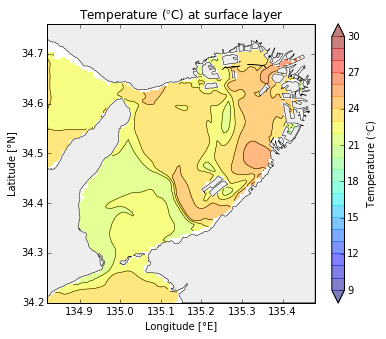

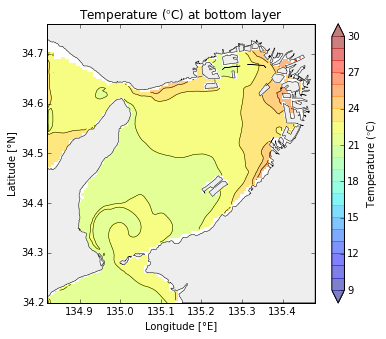

In [27]:
t = 0

#romspy.cmap('RdBu_r')
romspy.cmap('jet')
vname = 'temp'
kw = {}
kw['levels'] = np.arange(9,31,1)
kw['label'] = r'Temperature ($\degree$C)'
kw['extend'] = 'both'
kw['clabel'] = False
kw['linewidths'] = 0.5

#nc.zview(vname, t, -1.0, **kw)
nc.sview(vname, t, 19, **kw)
nc.sview(vname, t, 0, **kw)

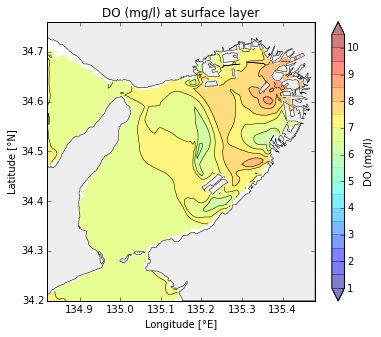

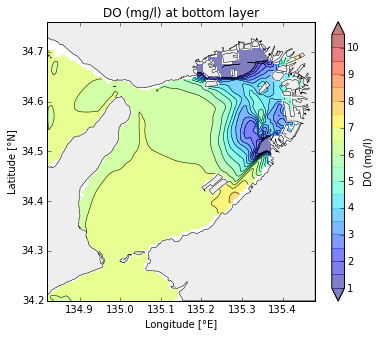

In [7]:
#romspy.cmap('RdBu_r')
vname = 'oxygen'
kw['cff'] = romspy.mol2g_O2
kw['levels'] = np.arange(1,11,0.5)
kw['label'] = 'DO (mg/l)'
kw['extend'] = 'both'
kw['clabel'] = False

nc.sview(vname, t, 19, **kw)
nc.sview(vname, t, 0, **kw)

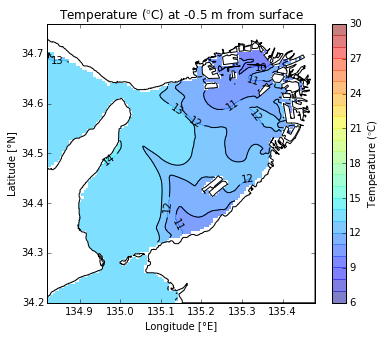

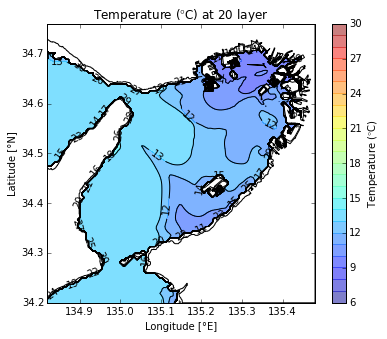

In [68]:

    
def sview(X, Y, var3d, k, contour=True, contourf=True, **kw):
    Z = var3d[k,:,:]
    fig, ax = plt.subplots(1,1,figsize=(6,5))
    if contourf:
        alpha = kw.pop('alpha',0.5)
        CF = ax.contourf(X, Y, Z, alpha=alpha, **kw)
        CB = plt.colorbar(CF)
    if contour:
        fmt = kw.pop('fmt', '%i')  # %.1f
        C = ax.contour(X, Y, Z, colors='k', **kw)
        C.clabel(colors='k', fmt=fmt)
    if 'label' in kw.keys():
        label = kw.pop('label')
        CB.ax.set_ylabel(label)
        ax.set_title('{} at {} layer'.format(label, k+1))
    else:
        ax.set_title('at {} layer'.format(k+1))
    romspy.basemap(mapfile)

zview(X, Y, temp, depth, -0.5, levels=levels, label=label)
sview(X, Y, temp, k=19, levels=levels, label=label)